<a href="https://colab.research.google.com/github/bgohrani/FeedForward_Networks/blob/main/Vectorized_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vectorized Learning Algorithm
Here we'll see the vector form of the learning algorithm which can be applied to a generalized feed forward neural network to optimize the process

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error
import matplotlib.colors
from sklearn.datasets import make_blobs
from sklearn.compose import ColumnTransformer
sns.set()

#Importing essential libraries

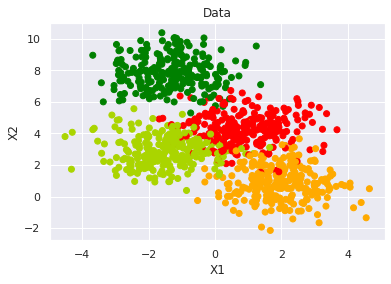

In [ ]:
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
data, labels = make_blobs(n_samples=1000,n_features = 2, centers = 4,random_state=0)
plt.scatter(data[:,0],data[:,1],c=labels,cmap=cmap1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data')
plt.show()


#Creating our own colour map cmap1
#Importing blob datasets and plotting

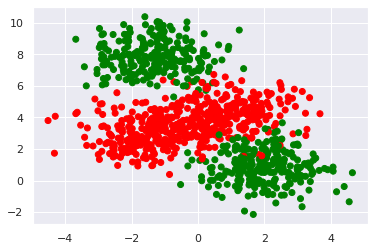

In [ ]:
labels_orig = labels
labels = np.mod(labels_orig,2)
plt.scatter(data[:,0],data[:,1],c=labels,cmap=cmap1)
plt.show()


#Changing the number of classes from 4 to 2 and plotting

In [ ]:
class FFNetwork_BP1:

  def __init__(self,n_inputs,n_outputs,n_hlayers=[2]):
    
    self.input = n_inputs
    self.output = n_outputs
    self.nh = len(n_hlayers)
    self.neurons = [n_inputs] + n_hlayers + [n_outputs]
    self.W = {}
    self.B = {}

    for i in range(self.nh +1):
      self.W[i+1] = np.random.randn(self.neurons[i+1],self.neurons[i])
      self.B[i+1] = np.zeros([self.neurons[i+1],1])
  
  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self,x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(-1,1)

    for i in range(self.nh):
      self.A[i+1] = np.matmul(self.W[i+1],self.H[i]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    
    self.A[self.nh+1] = np.matmul(self.W[self.nh+1],self.H[self.nh]) + self.B[self.nh+1]
    sum = np.sum(np.exp(self.A[self.nh+1]))
    self.H[self.nh+1] = np.exp(self.A[self.nh+1])/sum 
    return self.H[self.nh+1]
  
  def grad_sigmoid(self,x):
    return x*(1-x)
  
  def cross_entropy(self,Y,Y_pred):
    y_temp = np.multiply(Y,Y_pred)
    y_temp = y_temp[y_temp != 0]
    y_temp1 = -np.log(y_temp)
    return np.mean(y_temp1)

  
  def predict(self,X):
    Y_pred = []
    for x in X:
      Y_pred.append(self.forward_pass(x))
    return np.asarray(Y_pred).squeeze()

  def grad(self,x,y):
    self.forward_pass(x)
    self.dA = {}
    self.dH = {}
    self.dW = {}
    self.dB = {}
    L = self.nh+1
    self.dA[L] = (self.H[L]-y.reshape(-1,1))
    for i in range(L,0,-1):
      self.dW[i] = np.matmul(self.dA[i],np.transpose(self.H[i-1]))
      self.dB[i] = self.dA[i]
      if i>1:
        self.dH[i-1] = np.matmul(np.transpose(self.W[i]),self.dA[i])
        self.dA[i-1] = np.multiply(self.dH[i-1],self.grad_sigmoid(self.H[i-1]))



  def train(self,X,Y,epochs=1,lr=1,initialise=1,show_loss=0):
    loss = []
    if initialise==1:
      self.W = {}
      self.B = {}

      for i in range(self.nh +1):
        self.W[i+1] = np.random.randn(self.neurons[i+1],self.neurons[i])
        self.B[i+1] = np.zeros([self.neurons[i+1],1])

    for i in tqdm_notebook(range(epochs)):
      #print(i)
      dW={}
      dB={}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros([self.neurons[i+1],self.neurons[i]])
        dB[i+1] = np.zeros([self.neurons[i+1],1])
      for x,y in zip(X,Y):
        self.grad(x,y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
      
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= lr * dW[i+1] /m
        self.B[i+1] -= lr * dB[i+1] /m
      
      Y_pred = self.predict(X)
      loss.append(self.cross_entropy(Y,Y_pred))

    if show_loss ==1:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Cross Entropy Loss')
      plt.title('Loss During Training')
      plt.show()

      
#FOR GENERAL CLASS BINARY CLASSIFICATION   
#We have an initial function which takes as inputs number of x values and a list with no of neurons in each layer
#This is followed by an initialisation where W and B are dictionaries and each entry contains values for one layer
#The forward pass function calculates the output for given x and w,b
#Each initialisation or calculation contains a loop for each dictionary entry
#The train function initialises first, then takes dictionaries for dW and dB all set to 0
#Then for each x value grad is called and with a loop dW is increased with self.dW
#Then with a loop the values of self.W are incremented for each entry 
#With these values the output and loss are calculated, and a list is made for each epoch value
#Loss is plotted as usual

# FOR MULTI CLASS CLASSIFICATION
#Initial function takes one more input, number of classes or neurons in the output layer
#New softmax function which returns exp value/sum of all exp values for probability distribution
#In the forward pass function, the final layer is calculated outside the loop and the softmax function is called 
#Cross entropy loss function is introduced which takes element wise product of the actual and predicted data
#Log function is then used, ensuring no zeros are present


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,stratify=labels,random_state=0)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(750, 2) (750,) (250, 2) (250,)


In [ ]:
Y_train1 = Y_train.reshape(-1,1)
onehotencoder = OneHotEncoder() 
Y_train2 = onehotencoder.fit_transform(Y_train1).toarray()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


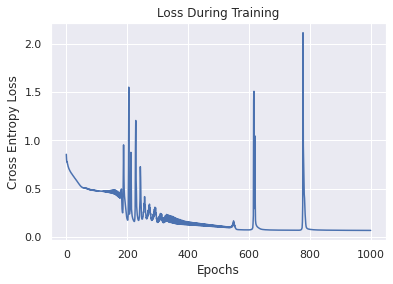

In [ ]:
f1 = FFNetwork_BP1(2,2,[4,3])
f1.train(X_train,Y_train2,epochs=1000,lr=0.005,initialise=1,show_loss=1)
## Training speed: 1.08s/iteration

In [ ]:
class FFNetwork_BP2:

  def __init__(self,n_inputs,n_outputs,n_hlayers=[2]):
    
    self.input = n_inputs
    self.output = n_outputs
    self.nh = len(n_hlayers)
    self.neurons = [n_inputs] + n_hlayers + [n_outputs]
    self.W = {}
    self.B = {}

    for i in range(self.nh +1):
      self.W[i+1] = np.random.randn(self.neurons[i+1],self.neurons[i])
      self.B[i+1] = np.zeros([self.neurons[i+1],1])
  
  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self,x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(-1,1)

    for i in range(self.nh):
      self.A[i+1] = np.matmul(self.W[i+1],self.H[i]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    
    self.A[self.nh+1] = np.matmul(self.W[self.nh+1],self.H[self.nh]) + self.B[self.nh+1]
    sum = np.sum(np.exp(self.A[self.nh+1]))
    self.H[self.nh+1] = np.exp(self.A[self.nh+1])/sum 
    return self.H[self.nh+1]
  
  def grad_sigmoid(self,x):
    return x*(1-x)
  
  def cross_entropy(self,Y,Y_pred):
    y_temp = np.multiply(Y,Y_pred)
    y_temp = y_temp[y_temp != 0]
    y_temp1 = -np.log(y_temp)
    return np.mean(y_temp1)

  
  def predict(self,X):
    Y_pred = []
    for x in X:
      Y_pred.append(self.forward_pass(x))
    return np.asarray(Y_pred).squeeze()

  def grad(self,x,y):
    self.forward_pass(x)
    self.dA = {}
    self.dH = {}
    self.dW = {}
    self.dB = {}
    L = self.nh+1
    self.dA[L] = (self.H[L]-y.reshape(-1,1))
    i = self.nh +1
    if i == self.nh+1:
      self.dW[i] = np.matmul(self.dA[i],np.transpose(self.H[i-1]))
      self.dB[i] = self.dA[i]
      self.dH[i-1] = np.matmul(np.transpose(self.W[i]),self.dA[i])
      self.dA[i-1] = np.multiply(self.dH[i-1],self.grad_sigmoid(self.H[i-1]))      

      i -=1
    
    while i>0:
      self.dW[i+1] = np.matmul(self.dA[i+1],np.transpose(self.H[i]))
      self.dB[i+1] = self.dA[i+1]
      self.dH[i] = np.matmul(np.transpose(self.W[i+1]),self.dA[i+1])
      self.dA[i] = np.multiply(self.dH[i],self.grad_sigmoid(self.H[i]))
      #print(i)
      i = i-1
    
    if i==0:
      #print(i)
      self.dW[i+1]= np.matmul(self.dA[i+1],np.transpose(self.H[i]))
      self.dB[i+1] = self.dA[i+1]



  def train(self,X,Y,epochs=1,lr=1,initialise=1,show_loss=0):
    loss = []
    if initialise==1:
      self.W = {}
      self.B = {}

      for i in range(self.nh +1):
        self.W[i+1] = np.random.randn(self.neurons[i+1],self.neurons[i])
        self.B[i+1] = np.zeros([self.neurons[i+1],1])

    for i in tqdm_notebook(range(epochs)):
      #print(i)
      dW={}
      dB={}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros([self.neurons[i+1],self.neurons[i]])
        dB[i+1] = np.zeros([self.neurons[i+1],1])
      for x,y in zip(X,Y):
        self.grad(x,y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
      
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= lr * dW[i+1] /m
        self.B[i+1] -= lr * dB[i+1] /m
      
      Y_pred = self.predict(X)
      loss.append(self.cross_entropy(Y,Y_pred))

    if show_loss ==1:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Cross Entropy Loss')
      plt.title('Loss During Training')
      plt.show()

      


  
# The weights are dealt using vectors and gradients are also calculated faster

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


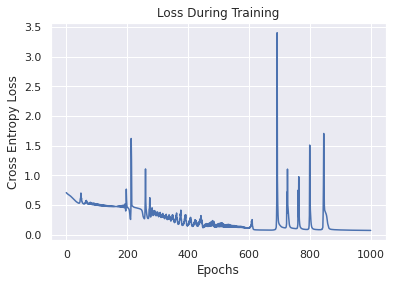

In [ ]:
f2 = FFNetwork_BP2(2,2,[4,3])
f2.train(X_train,Y_train2,epochs=1000,lr=0.005,initialise=1,show_loss=1)
## Training speed: 11.71iterations/second

In [ ]:
Y_pred_train1 = f2.predict(X_train)
Y_pred_test1 = f2.predict(X_test)

Y_pred_train = np.argmax(Y_pred_train1,axis=1)
Y_pred_test = np.argmax(Y_pred_test1,axis=1)

accuracy_train = accuracy_score(Y_pred_train,Y_train)
accuracy_test = accuracy_score(Y_pred_test,Y_test)
print(accuracy_train,accuracy_test)

0.9773333333333334 0.94


In [ ]:
class FFNetwork_BP3:

  def __init__(self,n_inputs,n_outputs,n_hlayers=[2]):
    
    self.input = n_inputs
    self.output = n_outputs
    self.nh = len(n_hlayers)
    self.neurons = [n_inputs] + n_hlayers + [n_outputs]
    self.W = {}
    self.B = {}

    for i in range(self.nh +1):
      self.W[i+1] = np.random.randn(self.neurons[i+1],self.neurons[i])
      self.B[i+1] = np.zeros([self.neurons[i+1],1])
  
  def sigmoid(self,X):
    return 1.0/(1.0 + np.exp(-X))
  
  
  def forward_pass(self,X):
    self.A = {}
    self.H = {}
    self.H[0] = np.transpose(X) #Final is a 2XN matrix N is 750

    for i in range(self.nh):
      self.A[i+1] = np.matmul(self.W[i+1],self.H[i]) + self.B[i+1] # (2X2) * (2XN) ---> (2XN)
      self.H[i+1] = self.sigmoid(self.A[i+1]) #(2XN)
    
    self.A[self.nh+1] = np.matmul(self.W[self.nh+1],self.H[self.nh]) + self.B[self.nh+1] #(2XN)
    sum = np.sum(np.exp(self.A[self.nh+1]),axis=0)
    self.H[self.nh+1] = np.exp(self.A[self.nh+1])/sum 
    return self.H[self.nh+1] #(2XN)
  
  def grad_sigmoid(self,X):
    return X*(1-X)
  
  def cross_entropy(self,Y,Y_pred):
    y_temp = np.multiply(np.transpose(Y),Y_pred)
    y_temp = y_temp[y_temp != 0]
    y_temp1 = -np.log(y_temp)
    return np.mean(y_temp1)

  
  def predict(self,X):
    Y_pred = self.forward_pass(X)
    return Y_pred.squeeze()

  def grad(self,X,Y):
    self.forward_pass(X)
    self.dA = {}
    self.dH = {}
    self.dW = {}
    self.dB = {}
    L = self.nh+1
    self.dA[L] = (self.H[L]-np.transpose(Y))
    for i in range(L,0,-1):
      self.dW[i] = np.matmul(self.dA[i],np.transpose(self.H[i-1]))
      self.dB[i] = np.sum(self.dA[i],axis=1).reshape(-1,1)
      if i>1:
        self.dH[i-1] = np.matmul(np.transpose(self.W[i]),self.dA[i])
        self.dA[i-1] = np.multiply(self.dH[i-1],self.grad_sigmoid(self.H[i-1]))



  def train(self,X,Y,epochs=1,lr=1,initialise=1,show_loss=0):
    loss = []
    if initialise==1:
      self.W = {}
      self.B = {}

      for i in range(self.nh +1):
        self.W[i+1] = np.random.randn(self.neurons[i+1],self.neurons[i])
        self.B[i+1] = np.zeros([self.neurons[i+1],1])

    for i in tqdm_notebook(range(epochs)):
      self.grad(X,Y)

      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= lr * self.dW[i+1] /m
        self.B[i+1] -= lr * self.dB[i+1] /m
      
      Y_pred = self.predict(X)
      loss.append(self.cross_entropy(Y,Y_pred))

    if show_loss ==1:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Cross Entropy Loss')
      plt.title('Loss During Training')
      plt.show()

      


  
#Same as above, inputs are sent in large batches and matrix multiplication is used to speed up the process

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


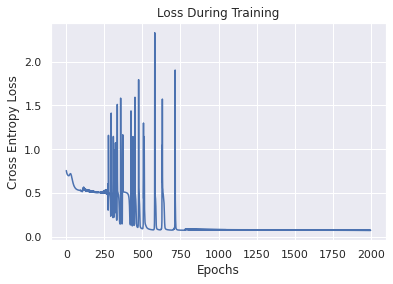

In [ ]:
f4 = FFNetwork_BP3(2,2,[4,3])
f4.train(X_train,Y_train2,epochs=2000,lr=0.005,initialise=0,show_loss=1)
## Training speed: 1275 iterations/second